In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Read the CSV file
df = pd.read_csv('costsensitiveregression.csv')
# apply log transform and add 1 to avoid log(0) to FNC column
# df['FNC'] = np.log(df['FNC'] + 1)

# Separate the independent variables (X) and the dependent variable (y)
X = df.iloc[:, :11]
y = df.iloc[:, 11:13]

X.drop('YesCount', axis=1, inplace=True)

print(X.dtypes)
print(y.dtypes)

# print the frequency of Status values from df
print(df['Status'].value_counts())



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create a custom dataset
class CSLogRegDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create DataLoader objects for training and testing
train_dataset = CSLogRegDataset(X_train, y_train)
test_dataset = CSLogRegDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


NotCount      int64
ATPM        float64
PFD         float64
PFG         float64
SFD         float64
SFG         float64
WP          float64
WS          float64
AH          float64
AN          float64
dtype: object
Status      int64
FNC       float64
dtype: object
0    103554
1     44082
Name: Status, dtype: int64
torch.Size([118108, 10]) torch.Size([29528, 10]) torch.Size([118108, 2]) torch.Size([29528, 2])


In [3]:
new_df = df['FNC']
new_df = new_df.round().astype(int)
# describe the new_df
print(new_df.describe())

count    1.476360e+05
mean     5.333955e+02
std      8.774013e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.200000e+01
75%      1.070000e+02
max      1.703186e+06
Name: FNC, dtype: float64


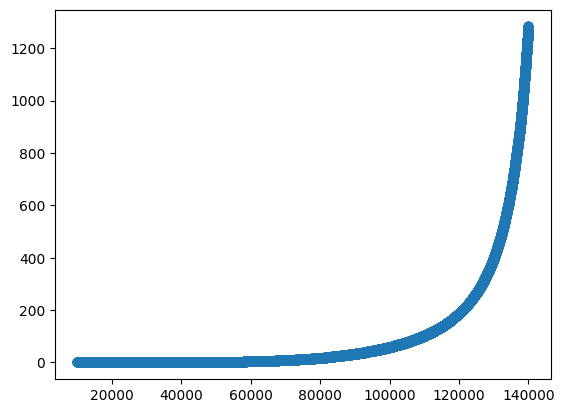

533.3955403831044 8773.982958504963
-85159.3 1788345.3


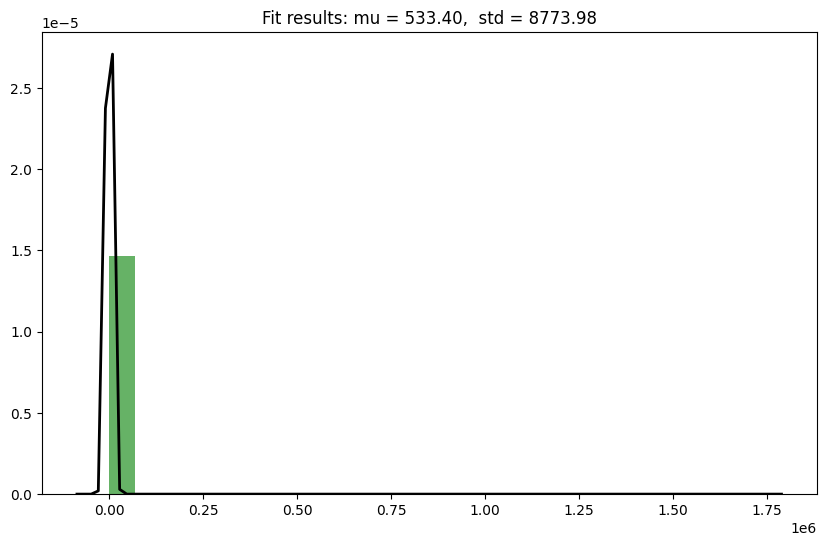

In [4]:
# make scatter plot of the new_df
# tmp_df is first 1000 rows of new_df
tmp_df = new_df[10000:140000]
plt.scatter(tmp_df.index, tmp_df)

plt.show()

# fit new_df to a normal distribution
from scipy.stats import norm
mu, std = norm.fit(new_df)
print(mu, std)

# plot the histogram of new_df
plt.figure(figsize=(10, 6))
plt.hist(new_df, bins=25, density=True, alpha=0.6, color='g')

# plot the PDF of the normal distribution
xmin, xmax = plt.xlim()
print(xmin, xmax)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlim(-1, 140000)
plt.show()


C:\Users\sumit\AppData\Local\Temp\ipykernel_35140\3943085003.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


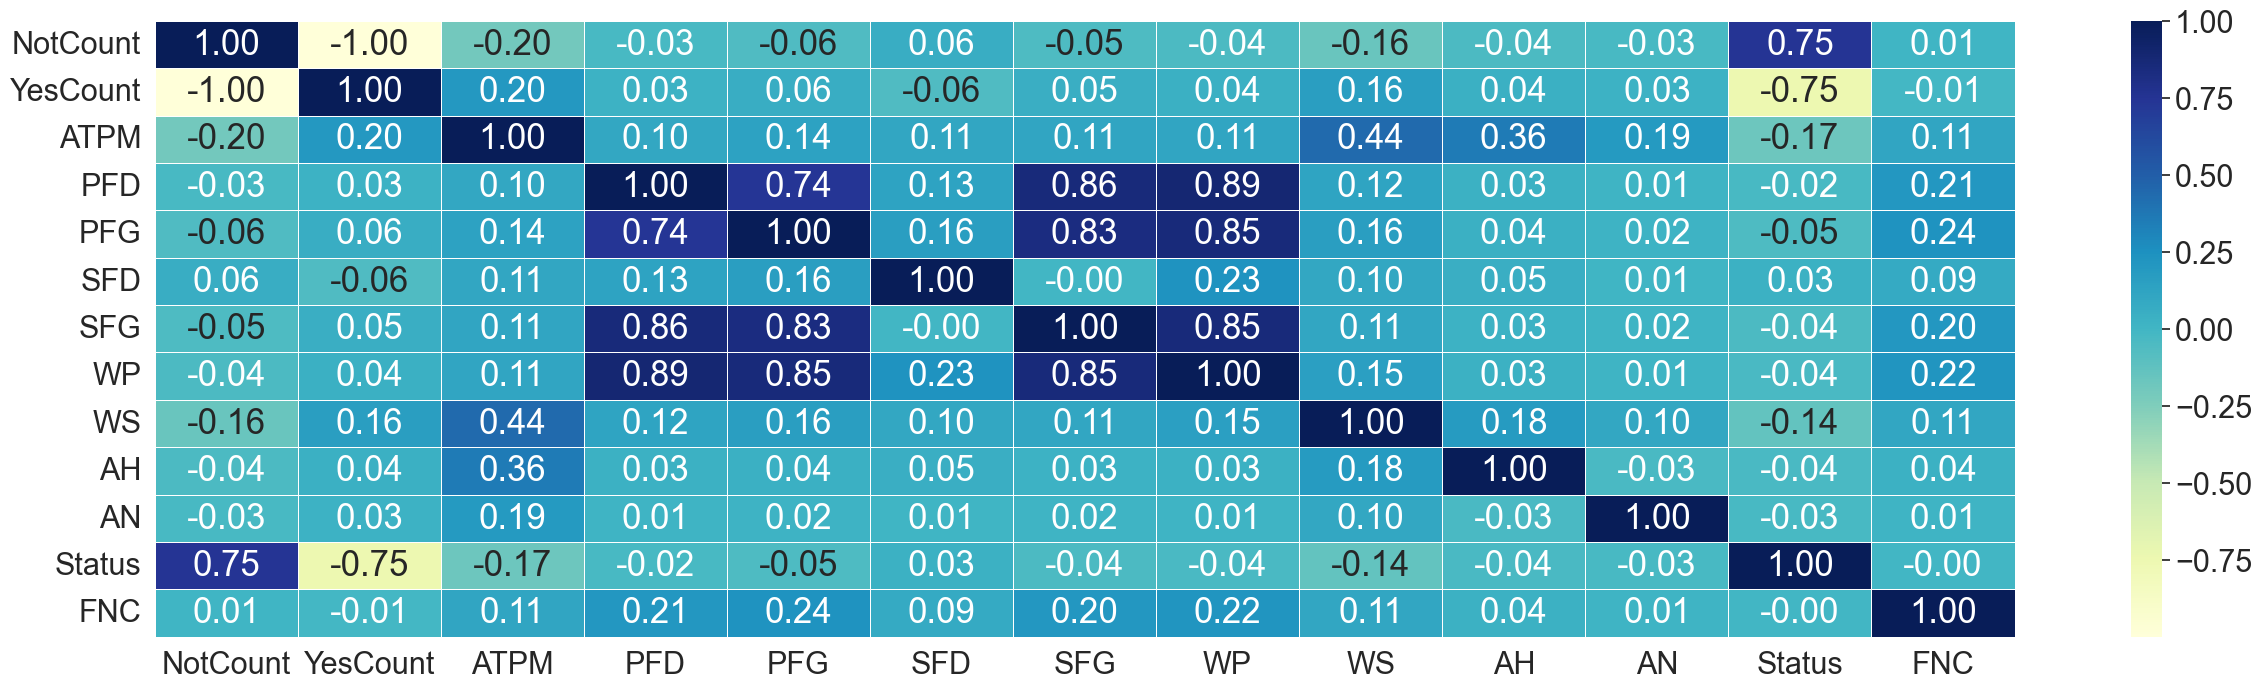

In [5]:
correlation_train = df.corr("pearson")
sns.set(font_scale=2)
fig = plt.figure(figsize=(30, 8))
ax = sns.heatmap(
    correlation_train,
    annot=True,
    annot_kws={"size": 25},
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
)
fig.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_35140\1772193469.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


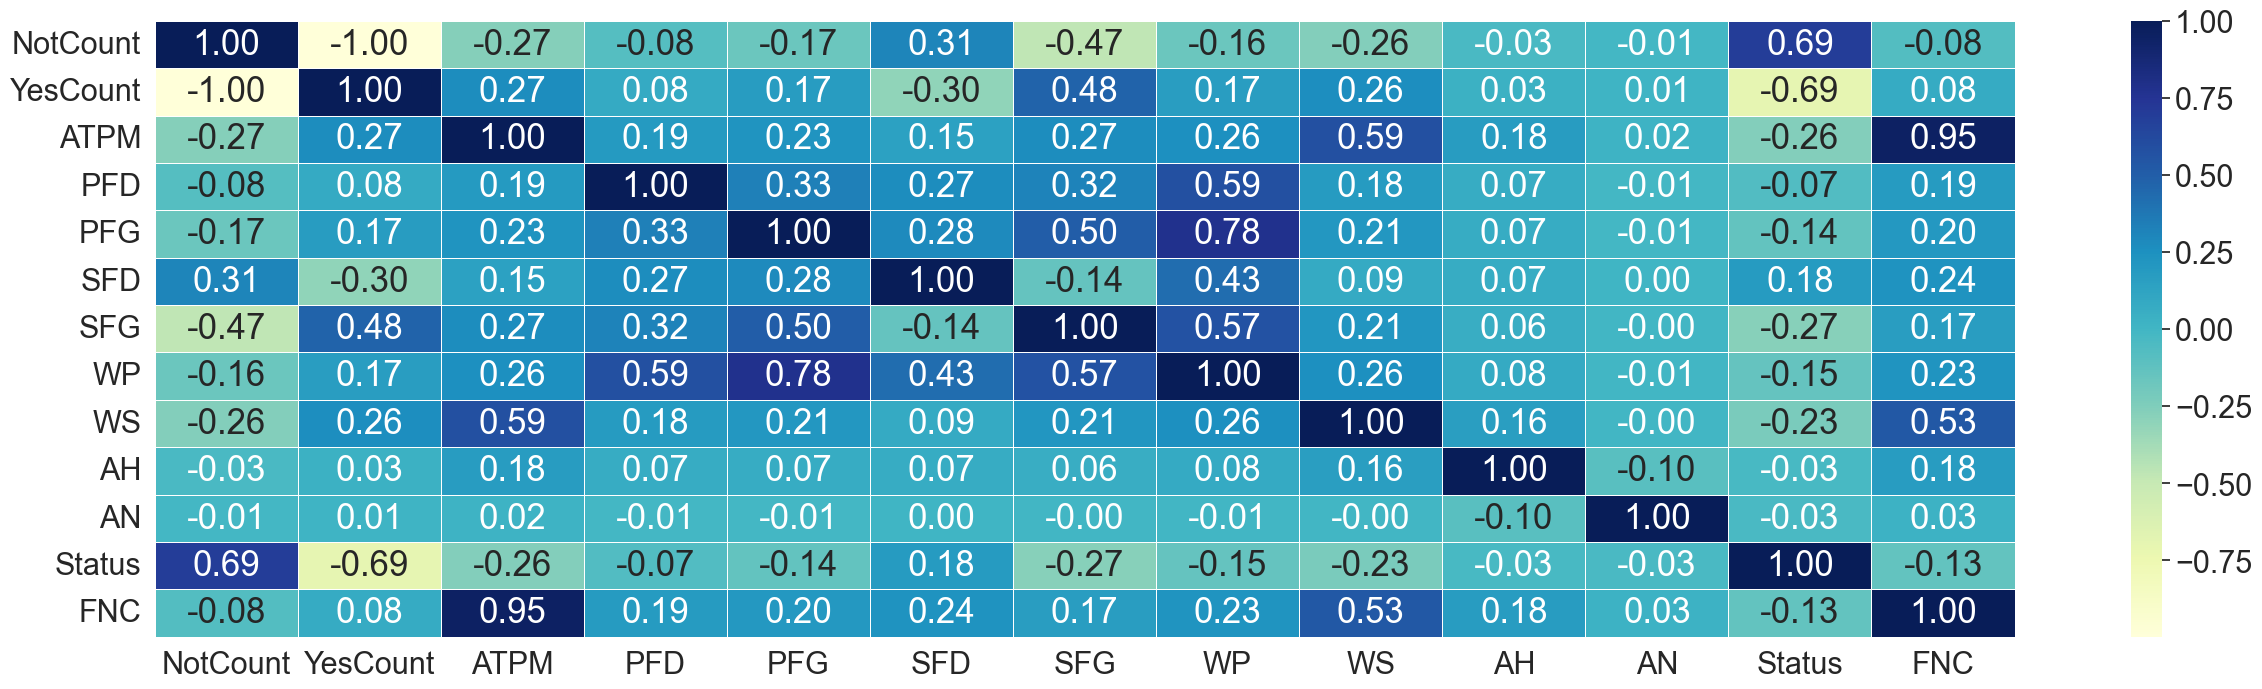

In [6]:
correlation_train = df.corr("spearman")
sns.set(font_scale=2)
fig = plt.figure(figsize=(30, 8))
ax = sns.heatmap(
    correlation_train,
    annot=True,
    annot_kws={"size": 25},
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
)
fig.show()

c:\Users\sumit\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\sumit\AppData\Local\Temp\ipykernel_35140\4164286662.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


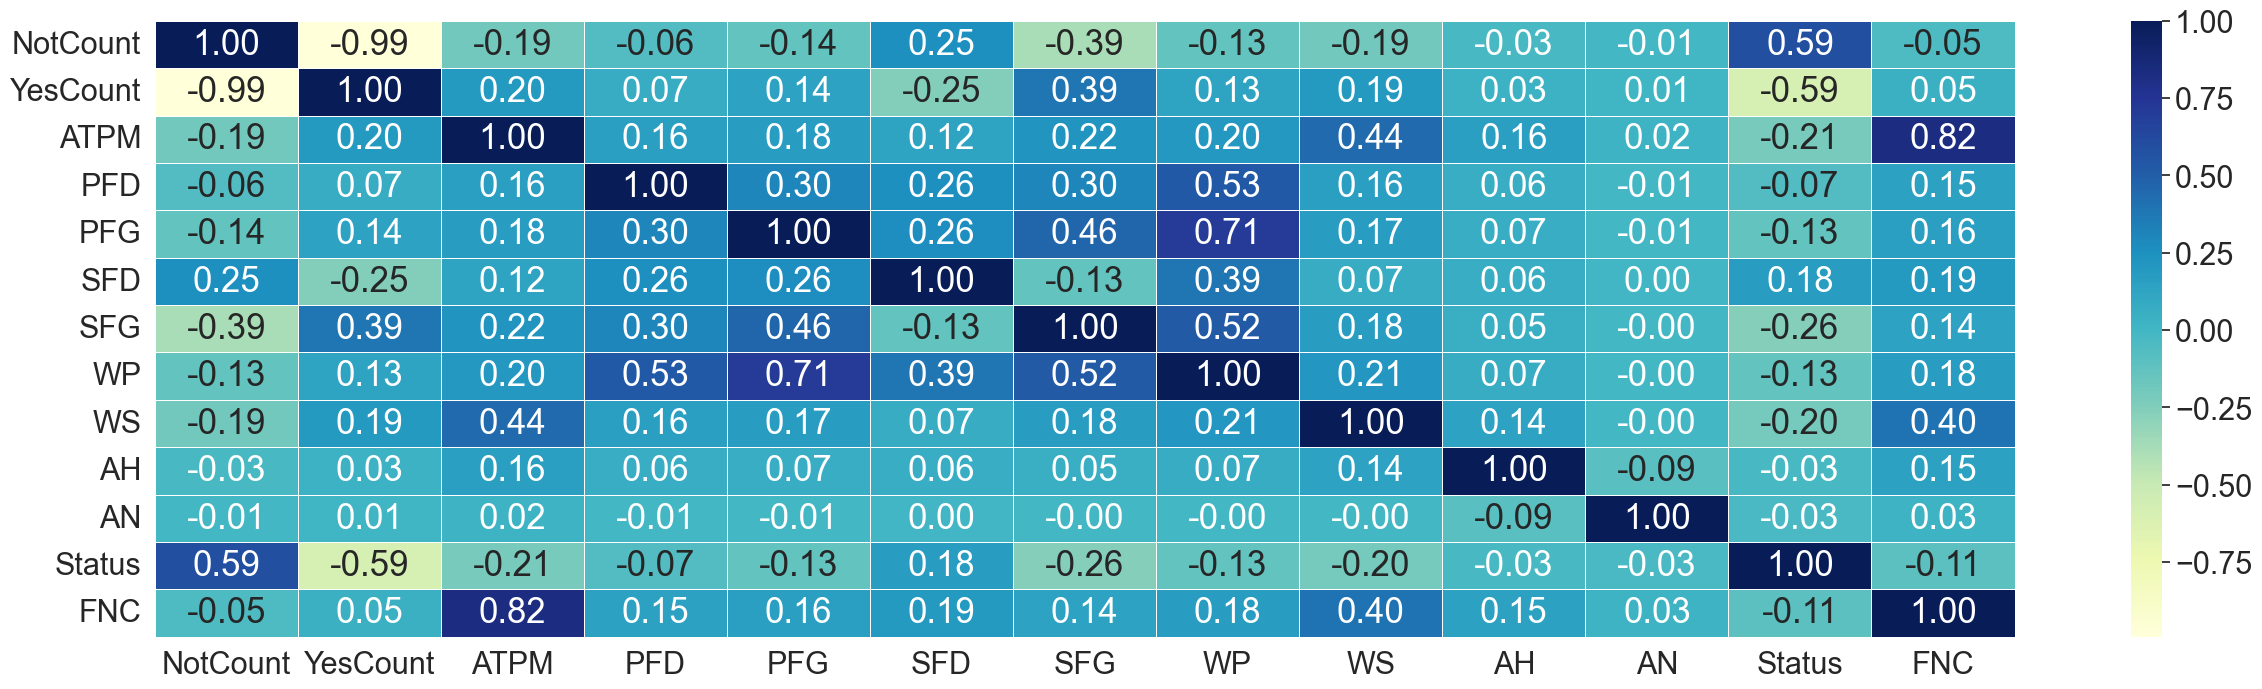

In [7]:
correlation_train = df.corr("kendall")
sns.set(font_scale=2)
fig = plt.figure(figsize=(30, 8))
ax = sns.heatmap(
    correlation_train,
    annot=True,
    annot_kws={"size": 25},
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
)
fig.show()

In [20]:
class CostSensitiveLogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(CostSensitiveLogisticRegression, self).__init__()   
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.model(x)
        return out


    def compute_loss(self, y_pred, y_true, false_negative_cost):
        epsilon = 1e-7
        true_positive_cost = 4.0
        false_positive_cost = 4.0
        true_negative_cost = 0
        # print("False Negative Cost: ",false_negative_cost.reshape(-1,1).shape)
        
        # print("Y_pred Shape: ",y_pred.shape)
        # print("Y_true Shape: ",y_true.shape)

        # Compute the losses for true positives, false positives, true negatives, and false negatives
        # tp_loss = y_true * torch.log(y_pred + epsilon) * true_positive_cost
        # fp_loss = y_true * torch.log(1 - y_pred + epsilon) * false_positive_cost
        # tn_loss = (1 - y_true) * torch.log(1 - y_pred + epsilon) * true_negative_cost
        # fn_loss = (1 - y_true) * torch.log(y_pred + epsilon) * false_negative_cost
        
        tp_loss = y_true * y_pred * true_positive_cost
        fp_loss = (1 - y_true) * y_pred * false_positive_cost
        fn_loss = (y_true * (1 - y_pred)) * false_negative_cost.reshape(-1,1)
        # tn_loss = (1 - y_true) * (1 - y_pred) * true_negative_cost
        tn_loss = torch.multiply((1 - y_true), (1 - y_pred)) * true_negative_cost
        # print((1-y_true).shape)
        # print((1-y_pred).shape)

        # Compute the total loss
        # total_loss = y_true * (y_pred * true_positive_cost + (1 - y_pred) * false_negative_cost) + (1 - y_true) * (y_pred * false_positive_cost + (1 - y_pred) * true_negative_cost)

        # total_loss = total_loss.mean()
        total_loss = tp_loss + fp_loss + tn_loss + fn_loss
        # print(tp_loss.shape, fp_loss.shape, tn_loss.shape, fn_loss.shape)
        # print("Loss Shape: ",total_loss.shape)
        total_loss = total_loss.mean()

        return total_loss


In [21]:
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0

    with torch.no_grad():
        for data, target in data_loader:
            # Forward pass
            output = model(data)
            # print(output)

            # Calculate the false_negative_cost from the target data
            false_negative_cost = target[:, 1]
            target = target[:, 0].view(-1, 1)

            # Compute the loss
            loss = model.compute_loss(output, target, false_negative_cost)

            # Update the total loss
            total_loss += loss.item()

            # Calculate the number of correct predictions
            predicted = (output > 0.5).float()
            correct += (predicted == target).sum().item()
            total += target.size(0)

    # Calculate accuracy and average loss
    accuracy = correct / total
    average_loss = total_loss / len(data_loader)

    return accuracy, average_loss


In [24]:
def train(model, train_loader, test_loader, num_epochs=10):
    model.train()
    correct_pred = 0
    loss_list = []
    best_model = None
    best_val = 0
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(num_epochs):
        epoch_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            
            output = model(data)
            
            false_negative_cost = target[:, 1]
            target = target[:, 0].view(-1, 1)
            
            loss = model.compute_loss(output, target, false_negative_cost)
            
            loss.backward()
            
            optimizer.step()
            
            epoch_loss += loss.item()
        
        loss_list.append(epoch_loss)
        
        # print training and validation accuracy and loss
        
        train_acc, train_loss = evaluate_model(model, train_loader)
        test_acc, test_loss = evaluate_model(model, test_loader)
        if test_acc > best_val:
            best_val = test_acc
            print(best_val)
            best_model = model
        
        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%") 

        
    return loss_list, best_model

In [25]:
model = CostSensitiveLogisticRegression(input_dim=X_train.shape[1])

loss_list, best_model = train(model, train_loader, test_loader, num_epochs=20)

print(evaluate_model(best_model, test_loader))


0.3009347060417231
Epoch 1/20 | Train Loss: 4.3181 | Train Acc: 30.11% | Test Loss: 3.8653 | Test Acc: 30.09%
Epoch 2/20 | Train Loss: 3.9490 | Train Acc: 29.86% | Test Loss: 3.9225 | Test Acc: 29.88%
Epoch 3/20 | Train Loss: 3.8962 | Train Acc: 29.86% | Test Loss: 3.8787 | Test Acc: 29.87%
0.4082565700352208
Epoch 4/20 | Train Loss: 3.5132 | Train Acc: 40.83% | Test Loss: 3.5136 | Test Acc: 40.83%
0.5939785965862909
Epoch 5/20 | Train Loss: 3.1342 | Train Acc: 59.37% | Test Loss: 3.1156 | Test Acc: 59.40%
0.6534137090219453
Epoch 6/20 | Train Loss: 2.8520 | Train Acc: 65.23% | Test Loss: 2.8298 | Test Acc: 65.34%
Epoch 7/20 | Train Loss: 2.7897 | Train Acc: 61.60% | Test Loss: 2.7915 | Test Acc: 61.51%
Epoch 8/20 | Train Loss: 2.7270 | Train Acc: 65.07% | Test Loss: 2.7328 | Test Acc: 65.12%
0.6743091303169872
Epoch 9/20 | Train Loss: 2.6894 | Train Acc: 67.28% | Test Loss: 2.6946 | Test Acc: 67.43%
0.6837239230560823
Epoch 10/20 | Train Loss: 2.6600 | Train Acc: 68.24% | Test Loss: 2

In [37]:
model = CostSensitiveLogisticRegression(input_dim=X_train.shape[1])

loss_list = train(model, train_loader, test_loader, num_epochs=20)


Epoch 1/20 | Train Loss: 6.3530 | Train Acc: 48.13% | Test Loss: 3.3959 | Test Acc: 48.01%
Epoch 2/20 | Train Loss: 5.6884 | Train Acc: 66.65% | Test Loss: 2.8255 | Test Acc: 66.58%
Epoch 3/20 | Train Loss: 5.4262 | Train Acc: 67.84% | Test Loss: 2.6880 | Test Acc: 67.85%
Epoch 4/20 | Train Loss: 3.6122 | Train Acc: 65.69% | Test Loss: 2.7396 | Test Acc: 65.60%
Epoch 5/20 | Train Loss: 2.8911 | Train Acc: 62.41% | Test Loss: 2.8210 | Test Acc: 62.28%
Epoch 6/20 | Train Loss: 2.8180 | Train Acc: 61.84% | Test Loss: 2.8256 | Test Acc: 61.76%
Epoch 7/20 | Train Loss: 2.7601 | Train Acc: 64.86% | Test Loss: 2.7410 | Test Acc: 64.84%
Epoch 8/20 | Train Loss: 2.9085 | Train Acc: 61.64% | Test Loss: 2.7765 | Test Acc: 61.54%
Epoch 9/20 | Train Loss: 2.8402 | Train Acc: 60.44% | Test Loss: 2.8419 | Test Acc: 60.31%
Epoch 10/20 | Train Loss: 2.7072 | Train Acc: 66.56% | Test Loss: 2.7242 | Test Acc: 66.43%
Epoch 11/20 | Train Loss: 2.6698 | Train Acc: 68.65% | Test Loss: 2.6878 | Test Acc: 68.6

In [ ]:
# Initialize the model, optimizer, and number of epochs
model = CostSensitiveLogisticRegression(input_dim=X_train.shape[1])
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
optimizer = optim.Adam(model.parameters())
num_epochs = 10

# Training loop
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)
        # print("Output Shape: ",output.shape)

        # Calculate the false_negative_cost from the target data
        false_negative_cost = target[:, 1]
        target = target[:, 0].view(-1, 1)
        # print(false_negative_cost)
        # print("Target Shape: ",target.shape)

        # Compute the loss
        loss = model.compute_loss(output, target, false_negative_cost)

        # Backward pass
        loss.backward()

        # Optimize
        optimizer.step()

        # Update the epoch loss
        epoch_loss += loss.item()

    # Store the average loss for this epoch
    train_losses.append(epoch_loss / len(train_loader))

    # Evaluate the model on the training set
    train_accuracy, _ = evaluate_model(model, train_loader)
    train_accuracies.append(train_accuracy)

    # Evaluate the model on the validation set
    val_accuracy, val_loss = evaluate_model(model, test_loader)
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

    # Print the results for this epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, Training Accuracy: {train_accuracies[-1] * 100:.2f}%, Validation Accuracy: {val_accuracies[-1] * 100:.2f}%')

# Plot the training and validation loss over time
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over time
plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
